In [26]:
from flask import Flask, render_template
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from pymongo import MongoClient
from sklearn.preprocessing import LabelEncoder
app = Flask(__name__)

# File path to the CSV
CSV_PATH = r"C:\Users\preit\OneDrive\Desktop\project_3\data\cleaned_alzheimers_disease_data.csv"
STATIC_PATH = os.path.join("static", "images")
# Load CSV file
file_path = r"C:\Users\preit\OneDrive\Desktop\project_3\data\cleaned_alzheimers_disease_data.csv"
df = pd.read_csv(file_path)

# Preview first few rows
df.head()

#

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,Male,White,Secondary,NaN,No,NaN,NaN,NaN,...,No,No,Dependent,No,No,No,Yes,No,No,NaN
1,4752,89,Male,White,NaN,NaN,No,NaN,NaN,NaN,...,No,No,Dependent,No,No,No,No,Yes,No,NaN
2,4753,73,Male,NaN,Primary,NaN,No,NaN,NaN,NaN,...,No,No,Independent,No,Yes,No,Yes,No,No,NaN
3,4754,74,Female,White,Primary,NaN,Yes,NaN,NaN,NaN,...,No,Yes,Independent,No,No,No,No,No,No,NaN
4,4755,89,Male,White,NaN,NaN,No,NaN,NaN,NaN,...,No,No,Dependent,No,No,Yes,Yes,No,No,NaN


In [ ]:
#load dataset
df=pd.read_csv('cleaned_alzheimers_disease_data.csv')





In [27]:
# Create an instance of MongoClient
mongo = MongoClient(port=27017)


In [28]:
# assign the alzheimer_database to a variable name
alzheimer_db = mongo['alzheimer_database']

# Drop fully empty columns

In [29]:
df = df.drop(columns=["BMI", "DoctorInCharge"], errors='ignore')

# Encode categorical variables

In [30]:
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le
    # Calculate correlation matrix
correlation_matrix = df.corr()

<Figure size 600x400 with 0 Axes>

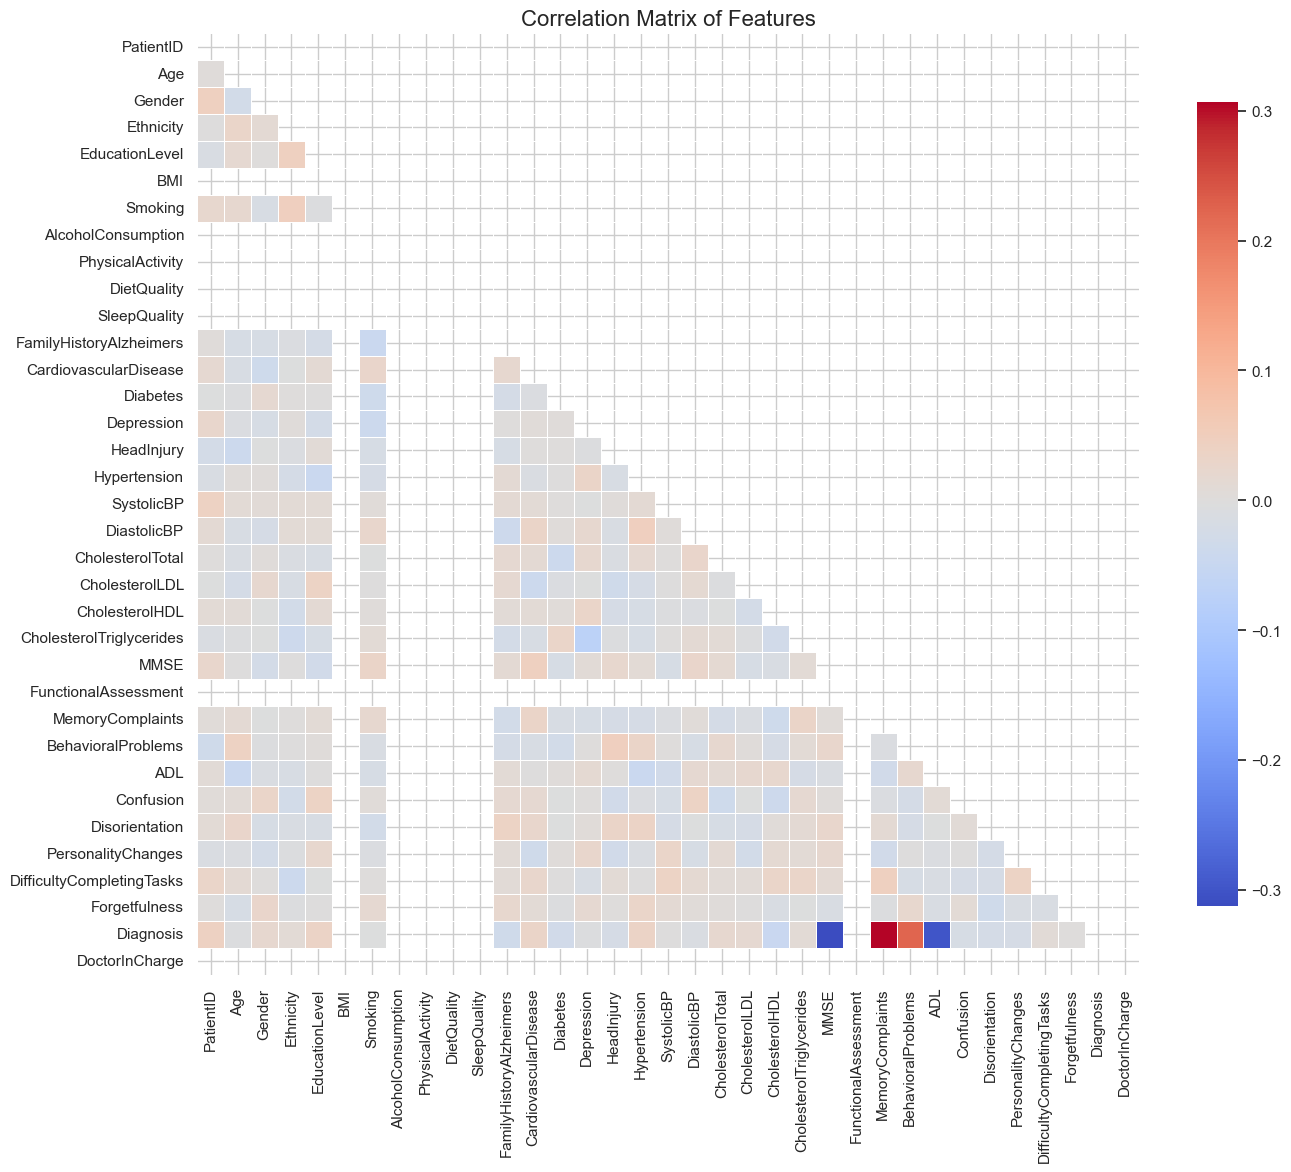

In [19]:
# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)),
            linewidths=0.5, cbar_kws={"shrink": .8}, square=True)
plt.title("Correlation Matrix of Features", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [23]:
#Create age bins
df_viz = df
age_bins = [0, 50, 60, 70, 80, 90, 100]
age_labels = ['<50', '50-59', '60-69', '70-79', '80-89', '90+']
df_viz['AgeRange'] = pd.cut(df_viz['Age'], bins=age_bins, labels=age_labels)

# Plot 1: Count of patients by Age Range, Gender, and Diabetes status

<Figure size 1400x600 with 0 Axes>

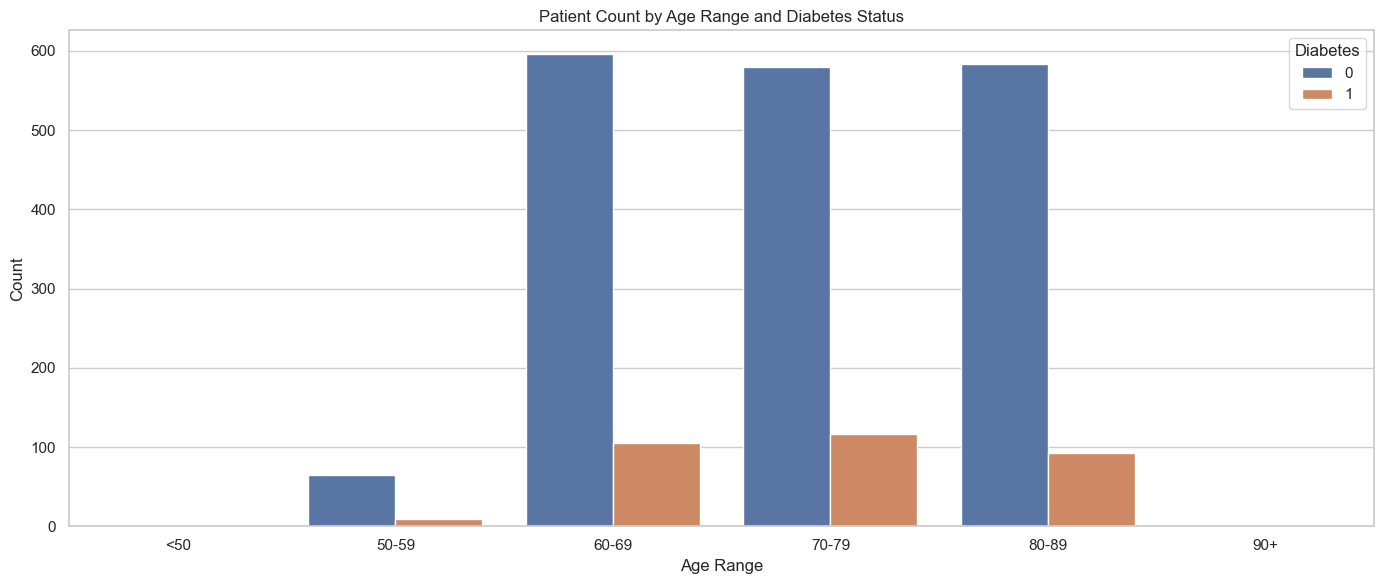

In [24]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_viz, x='AgeRange', hue='Diabetes')
plt.title('Patient Count by Age Range and Diabetes Status')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.legend(title='Diabetes')
plt.tight_layout()
plt.show()

# Gender distribution by Age Range

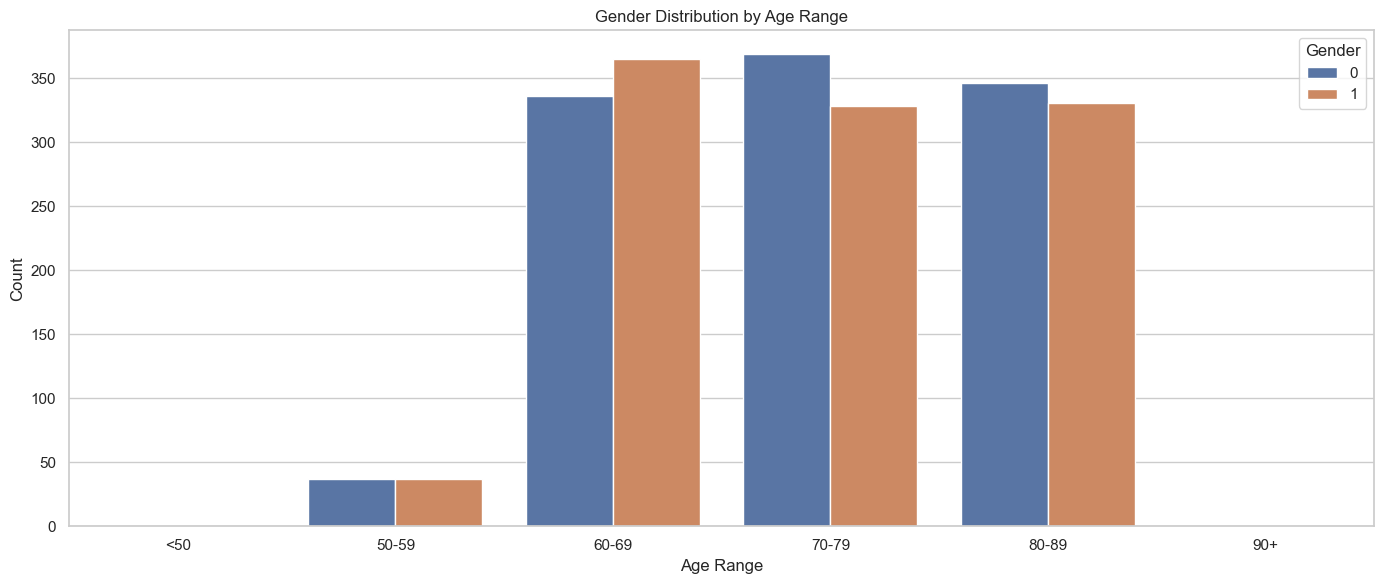

In [25]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_viz, x='AgeRange', hue='Gender')
plt.title('Gender Distribution by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()